Seminar: Sprechstile – maschinelle Eigenschaftsanalyse

Importiert unterstützende Libraries in das Jupyter Notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

Liest CSV-Datei in das Notebook ein. Jede Zeile muss den jeweiligen Dateipfad (& Namen) und die Valenz enthalten.

In [2]:
df = pd.read_csv('labels.txt', sep = ' ', header=None)

Gibt aus welchen Datentyp ich eingelesen habe.

In [3]:
type(df)

pandas.core.frame.DataFrame

Gibt Zeilen- und Spaltenanzahl der gelesenen Datei aus.

In [4]:
df.shape

(46, 2)

Zeigt die ersten fünf Zeilen der eingelesenen Datei an. Die Zahl in Klammern variiert die Zeilenanzahl.

In [5]:
df.head(5)

,0,1
0,../NellesenSound/Nellesen_16_seg_00000000.wav,3.0
1,../NellesenSound/Nellesen_16_seg_00000001.wav,4.0
2,../NellesenSound/Nellesen_16_seg_00000002.wav,4.0
3,../NellesenSound/Nellesen_16_seg_00000003.wav,4.0
4,../NellesenSound/Nellesen_16_seg_00000004.wav,2.0


Benennt die Spalten in 'file' und 'valence'.

In [6]:
cols=['file', 'valence']

In [7]:
df.columns = cols

In [8]:
df = df.set_index('file')

Nimmt den bisherigen Wert bei 'file' und ersetzt diesen nur mit dem enthaltenen Dateinamen.

In [9]:
df.index = df.index.to_series().apply(lambda x: os.path.basename(x))

In [10]:
df.head(2)

,valence
file,
Nellesen_16_seg_00000000.wav,3.0
Nellesen_16_seg_00000001.wav,4.0


Gibt aus welchen Typ die Valenz hat.

In [11]:
type(df.valence)

pandas.core.series.Series

Plottet den Dataframe automatisch, nimmt Spalte 1 als X-Achse und Spalte 2 als Y-Achse.

<AxesSubplot:xlabel='file'>

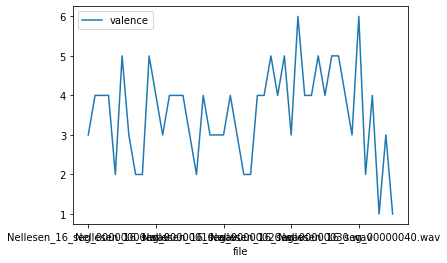

In [12]:
df.plot()

Zählt als eine Art Histogramm wie häufig die jeweilige Valenz vorkommt.

In [13]:
df.valence.value_counts()

4.0    17
3.0    11
2.0     7
5.0     7
6.0     2
1.0     2
Name: valence, dtype: int64

Plottet das Histogramm als Säulendiagramm.

<AxesSubplot:>

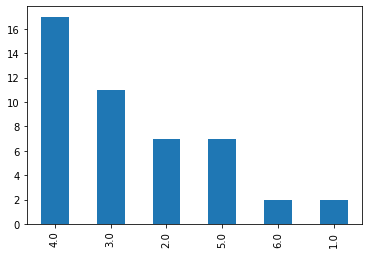

In [14]:
df.valence.value_counts().plot(kind='bar')

Plottet das Histogramm als Kuchendiagramm.

<AxesSubplot:ylabel='valence'>

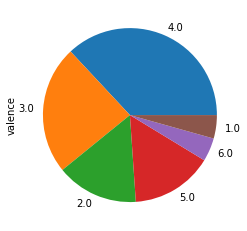

In [15]:
df.valence.value_counts().plot(kind='pie')

Gibt verschiedene Informationen über den Dataframe aus wie bspw. Speicherverbrauch, Einträge (Zeilen) und Datentyp.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, Nellesen_16_seg_00000000.wav to Nellesen_16_seg_00000045.wav
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   valence  46 non-null     float64
dtypes: float64(1)
memory usage: 736.0+ bytes


Gibt den Dataframe im "whitegrid"-Stil mit der Valenz auf der X-Achse als Violinplot aus.

In [17]:
sns.set_theme(style="whitegrid")

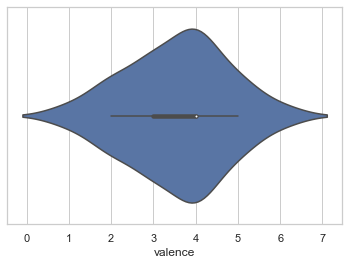

In [18]:
ax = sns.violinplot(x=df.valence)

Liest neuen Dataframe aus pickle-Datei ein mit den vorher gemessenen Grundfrequenzen aus dem Praat-Script.

In [19]:
df_f0 = pd.read_pickle ('meanf0.pkl')

In [20]:
df_f0.head(2)

,voiceID,meanF0Hz
0,../NellesenSound\Nellesen_16_seg_00000000.wav,138.03211589085302
1,../NellesenSound\Nellesen_16_seg_00000001.wav,140.03268783183862


Diese Funktion normalisiert den Dataframe ähnlich wie oben bereits geschehen. Hier werden im Unterschied zu oben die Spalten umbenannt (voiceID -> file).

In [21]:
def norm_df(df):
    df = df.rename(columns={'voiceID' : 'file'})
    df = df.set_index('file')
    df.index = df.index.to_series().apply(lambda x: os.path.basename(x))
    return df

In [22]:
df_f0 = norm_df(df_f0)

In [23]:
df_f0.head(2)

,meanF0Hz
file,
Nellesen_16_seg_00000000.wav,138.03211589085302
Nellesen_16_seg_00000001.wav,140.03268783183862


Verbindet die beiden Dataframes miteinander. Das funktioniert nur, weil vorher VoiceID zu file umbenannt wurde.

In [24]:
df = df.join(df_f0)

Ändert den Datentypen zu Fließkommazahl.

In [25]:
df['meanF0Hz'] = df_f0['meanF0Hz'].astype(float)

Plottet die Grundfrequenz auf der Y-Achse und die Valence auf der X-Achse in einem dunklen blau.

<AxesSubplot:xlabel='valence', ylabel='meanF0Hz'>

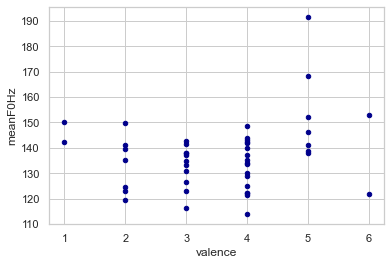

In [26]:
df.plot.scatter(y='meanF0Hz', x='valence', c='DarkBlue')

In [27]:
df.head(2)

,valence,meanF0Hz
file,,
Nellesen_16_seg_00000000.wav,3.0,138.032116
Nellesen_16_seg_00000001.wav,4.0,140.032688


Liest einen neuen Dataframe aus den Feinberg Praat Skripts ein mit anderen Messdaten.

In [28]:
measures_df = pd.read_pickle('df_werte.pkl')

In [29]:
measures_df.head(2)


,voiceID,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,...,f4_median,JitterPCA,ShimmerPCA,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f
0,../NellesenSound\Nellesen_16_seg_00000000.wav,1.62,138.032116,9.225841,13.833710,0.021991,0.000160,0.008185,0.011459,0.024556,...,3367.405786,2.913234,0.056890,0.186858,996.951473,1912.929611,1462.971189,19.273052,963.929051,18.154863
1,../NellesenSound\Nellesen_16_seg_00000001.wav,5.40,139.994580,25.988065,12.641527,0.024912,0.000178,0.010345,0.012082,0.031035,...,3343.278039,-0.368369,1.641947,0.159001,971.514450,1882.327844,1463.715658,19.167467,952.489198,18.372912


Entfernt die Grundfrequenz, da diese bereits aus dem vorherigen Dataframe enthalten ist.

In [30]:
df = df.drop(columns=['meanF0Hz'])

Setzt Sprecher und Geschlecht in allen Zeilen.

In [31]:
df['speaker'] = 'jannis'

In [32]:
df['sex'] = 'male'

In [33]:
df.head(1)

,valence,speaker,sex
file,,,
Nellesen_16_seg_00000000.wav,3.0,jannis,male


Benennt VoiceID wieder in file um, damit joinen möglich wird.

In [34]:
measures_df = norm_df(measures_df)

In [35]:
df_all = df.join(measures_df)

In [36]:
df_all.head(5)

,valence,speaker,sex,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,...,f4_median,JitterPCA,ShimmerPCA,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f
file,,,,,,,,,,,,,,,,,,,,,
Nellesen_16_seg_00000000.wav,3.0,jannis,male,1.62,138.032116,9.225841,13.833710,0.021991,0.000160,0.008185,...,3367.405786,2.913234,0.056890,0.186858,996.951473,1912.929611,1462.971189,19.273052,963.929051,18.154863
Nellesen_16_seg_00000001.wav,4.0,jannis,male,5.40,139.994580,25.988065,12.641527,0.024912,0.000178,0.010345,...,3343.278039,-0.368369,1.641947,0.159001,971.514450,1882.327844,1463.715658,19.167467,952.489198,18.372912
Nellesen_16_seg_00000002.wav,4.0,jannis,male,2.70,142.104801,19.648685,12.709082,0.025809,0.000182,0.011067,...,3336.445622,-0.168193,1.087785,0.583368,982.493825,1935.132758,1480.663155,19.024088,974.943130,17.949765
Nellesen_16_seg_00000003.wav,4.0,jannis,male,2.42,144.032920,34.096210,13.745294,0.031511,0.000220,0.014398,...,3292.804508,-1.207391,-2.076215,0.538350,961.897631,1926.418672,1496.766625,18.780848,964.624205,18.141780
Nellesen_16_seg_00000004.wav,2.0,jannis,male,5.68,135.085800,12.895143,13.356369,0.022358,0.000166,0.010386,...,3295.044219,0.820913,0.451978,0.165721,989.821113,1921.269925,1423.011337,20.035492,970.433594,18.033176


Generiert eine neue pickle-Datei mit den vereinten Daten aus den unterschiedlichen Dataframes.

In [37]:
df_all.to_pickle('nellesen_df.pkl')

Ignoriert die ersten drei Spalten (Valence, Speaker, Sex).

In [38]:
df_all.iloc[:,3:]

,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,...,f4_median,JitterPCA,ShimmerPCA,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f
file,,,,,,,,,,,,,,,,,,,,,
Nellesen_16_seg_00000000.wav,1.62,138.032116,9.225841,13.833710,0.021991,0.000160,0.008185,0.011459,0.024556,0.089212,...,3367.405786,2.913234,0.056890,0.186858,996.951473,1912.929611,1462.971189,19.273052,963.929051,18.154863
Nellesen_16_seg_00000001.wav,5.40,139.994580,25.988065,12.641527,0.024912,0.000178,0.010345,0.012082,0.031035,0.113241,...,3343.278039,-0.368369,1.641947,0.159001,971.514450,1882.327844,1463.715658,19.167467,952.489198,18.372912
Nellesen_16_seg_00000002.wav,2.70,142.104801,19.648685,12.709082,0.025809,0.000182,0.011067,0.012556,0.033200,0.105251,...,3336.445622,-0.168193,1.087785,0.583368,982.493825,1935.132758,1480.663155,19.024088,974.943130,17.949765
Nellesen_16_seg_00000003.wav,2.42,144.032920,34.096210,13.745294,0.031511,0.000220,0.014398,0.016121,0.043194,0.102900,...,3292.804508,-1.207391,-2.076215,0.538350,961.897631,1926.418672,1496.766625,18.780848,964.624205,18.141780
Nellesen_16_seg_00000004.wav,5.68,135.085800,12.895143,13.356369,0.022358,0.000166,0.010386,0.012589,0.031157,0.101330,...,3295.044219,0.820913,0.451978,0.165721,989.821113,1921.269925,1423.011337,20.035492,970.433594,18.033176
Nellesen_16_seg_00000005.wav,1.58,152.269223,21.689414,13.382492,0.034018,0.000226,0.015145,0.016944,0.045434,0.120076,...,3166.470743,-2.812184,-0.501609,-0.656489,940.745146,1835.217072,1381.157749,20.477515,928.036536,18.857016
Nellesen_16_seg_00000006.wav,2.40,137.176334,10.225154,12.623347,0.028900,0.000212,0.014266,0.016103,0.042797,0.097977,...,3074.204412,-1.335264,-1.365190,-0.517680,892.817520,1821.921191,1410.204786,19.940971,915.238977,19.120689
Nellesen_16_seg_00000007.wav,2.12,119.233807,11.562480,11.712906,0.030083,0.000252,0.013831,0.016940,0.041492,0.134628,...,3557.946932,-3.896559,1.081428,0.222688,1067.971012,1919.408443,1411.736302,20.063288,989.857022,17.679321
Nellesen_16_seg_00000008.wav,3.42,137.733800,24.947202,12.093408,0.027500,0.000200,0.012684,0.014822,0.038053,0.105084,...,3271.476628,-0.800444,-0.134976,0.520724,966.087242,1938.046958,1483.639120,19.047930,969.109353,18.057818


Gibt alle Spaltennamen aus.

In [39]:
for i, col in enumerate(df_all.iloc[:,0:].columns):
    print(col)

valence
speaker
sex
duration
meanF0Hz
stdevF0Hz
HNR
localJitter
localabsoluteJitter
rapJitter
ppq5Jitter
ddpJitter
localShimmer
localdbShimmer
apq3Shimmer
apq5Shimmer
apq11Shimmer
ddaShimmer
f1_mean
f2_mean
f3_mean
f4_mean
f1_median
f2_median
f3_median
f4_median
JitterPCA
ShimmerPCA
pF
fdisp
avgFormant
mff
fitch_vtl
delta_f
vtl_delta_f


Gibt für jede Spalte, ausser die ersten drei, einen (Box-)plot aus mit der Valence auf der X-Achse und der jeweiligen Spalte auf der Y-Achse aus.

c:\users\jannis\seminarsprechstile\venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<Figure size 432x288 with 0 Axes>

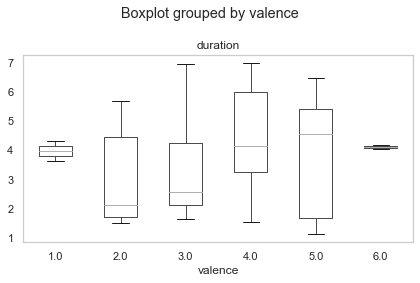

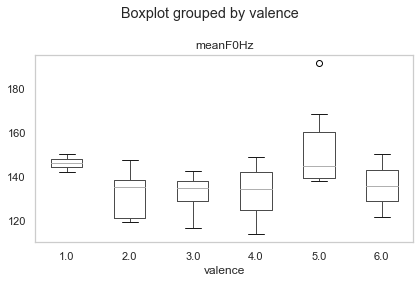

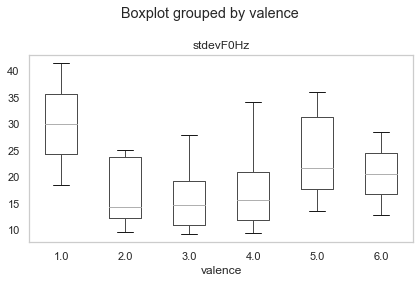

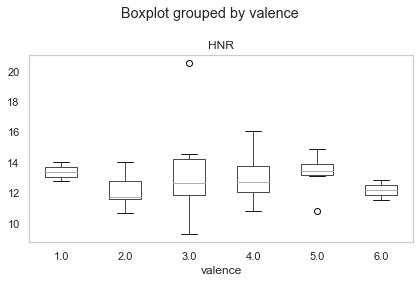

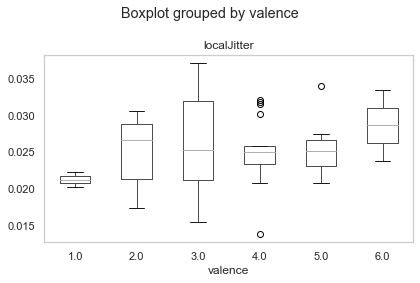

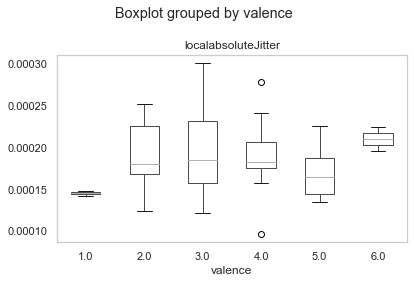

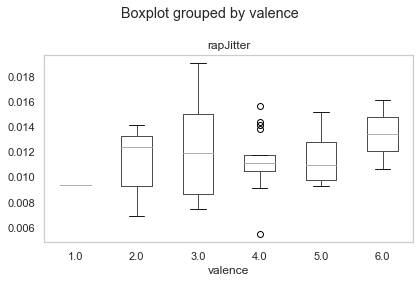

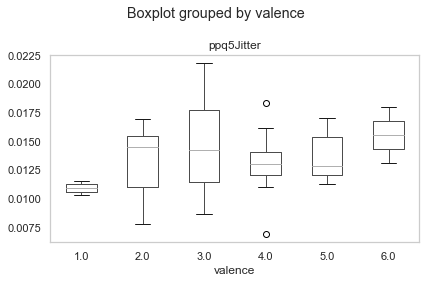

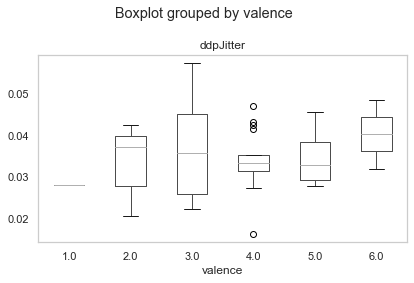

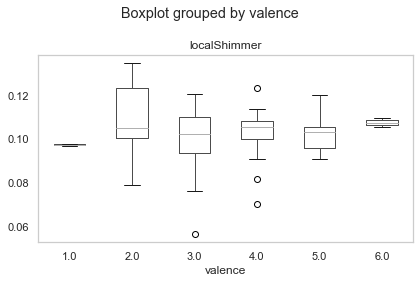

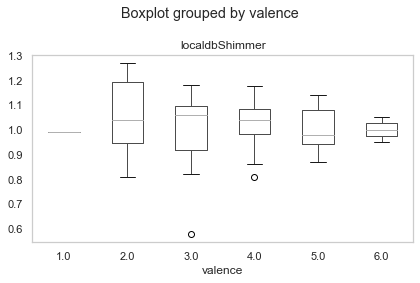

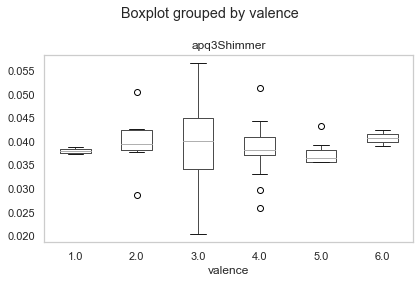

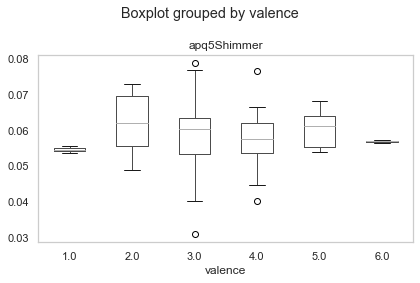

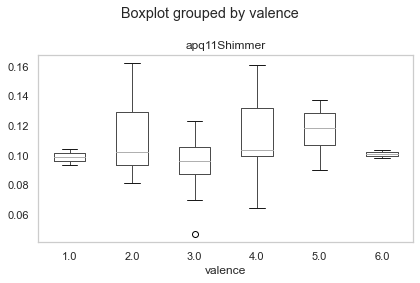

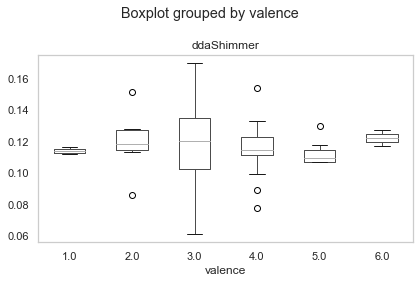

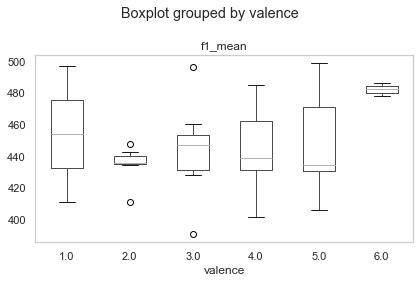

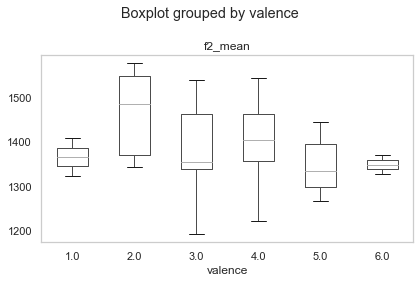

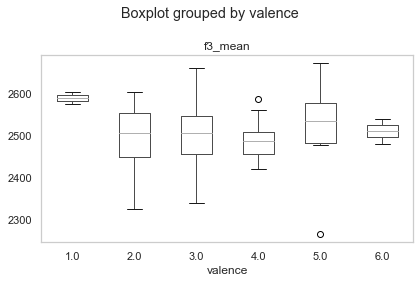

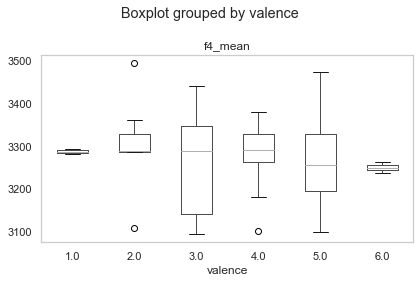

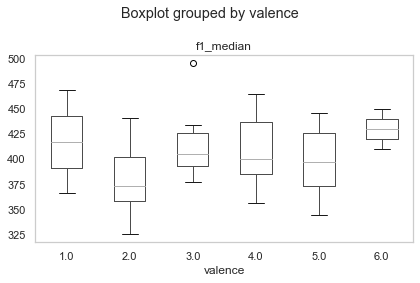

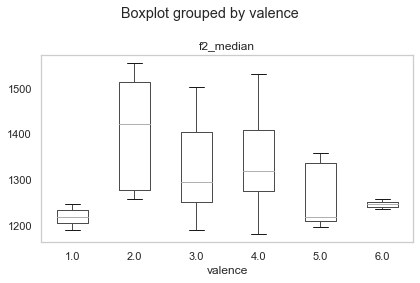

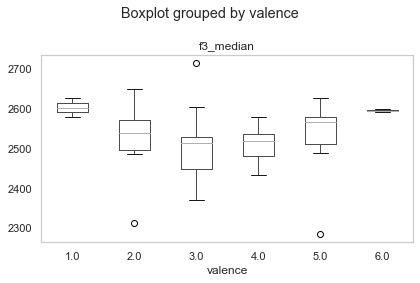

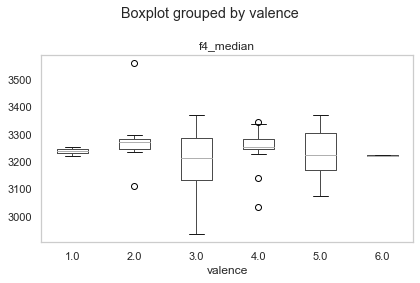

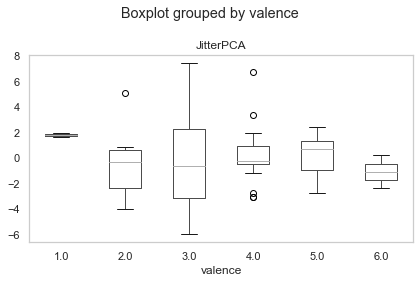

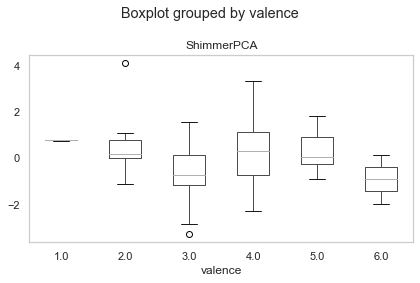

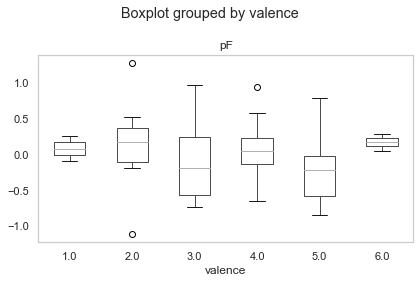

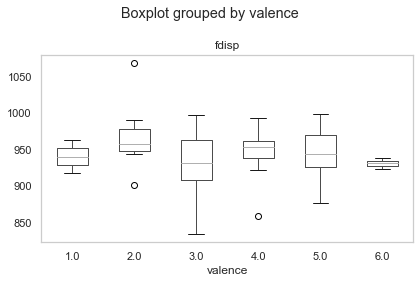

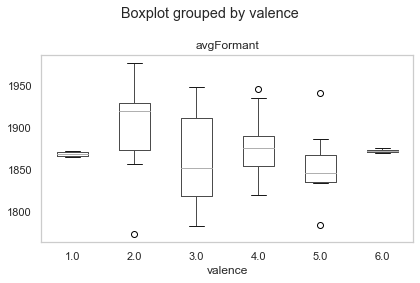

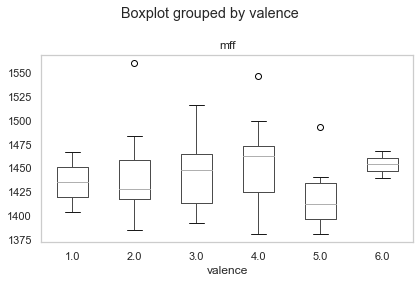

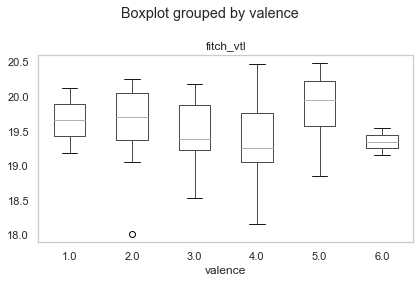

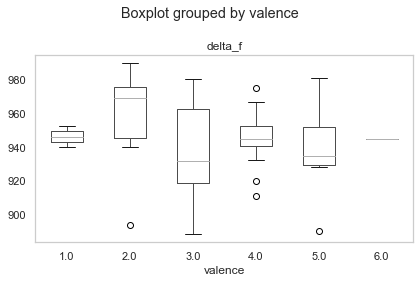

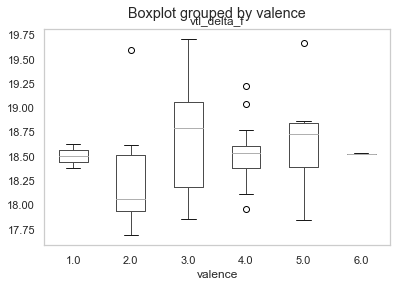

In [40]:
for i, col in enumerate(df_all.iloc[:,3:].columns):
    plt.tight_layout()
    df_all.boxplot(by ='valence', column =col, grid = False)

Führt eine statistische Auswertung der Daten mittels Pearson Correlation Coefficent und p-wert durch.
Somit kann prinzipiell errechnet werden, welcher der Werte die höchste Korrelation mit der Valence besitzt.

In [41]:
pearsons = []
for i, col in enumerate(df_all.iloc[:,3:].columns):
    if np.isnan(df_all[col]).any():
        print('{} includes {} nan, I\'ll insert mean values'.format(col, df_all[col].isna().sum()))
        df_all[col] = df_all[col].fillna(df_all[col].mean())
    r, p = pearsonr(df_all['valence'], df_all[col])
    pearsons.append({'val':col, 'pcc': round(r, 3), 'p-val':round(p, 3)})


In [42]:
sorted(pearsons, key=lambda x: -x['pcc'])

[{'val': 'meanF0Hz', 'pcc': 0.226, 'p-val': 0.13},
 {'val': 'f1_mean', 'pcc': 0.207, 'p-val': 0.167},
 {'val': 'duration', 'pcc': 0.147, 'p-val': 0.33},
 {'val': 'localJitter', 'pcc': 0.131, 'p-val': 0.387},
 {'val': 'rapJitter', 'pcc': 0.122, 'p-val': 0.419},
 {'val': 'ddpJitter', 'pcc': 0.122, 'p-val': 0.419},
 {'val': 'f1_median', 'pcc': 0.117, 'p-val': 0.438},
 {'val': 'ppq5Jitter', 'pcc': 0.116, 'p-val': 0.442},
 {'val': 'apq11Shimmer', 'pcc': 0.114, 'p-val': 0.45},
 {'val': 'vtl_delta_f', 'pcc': 0.101, 'p-val': 0.504},
 {'val': 'stdevF0Hz', 'pcc': 0.079, 'p-val': 0.604},
 {'val': 'HNR', 'pcc': 0.037, 'p-val': 0.805},
 {'val': 'fitch_vtl', 'pcc': 0.028, 'p-val': 0.854},
 {'val': 'localabsoluteJitter', 'pcc': 0.024, 'p-val': 0.873},
 {'val': 'f3_median', 'pcc': -0.005, 'p-val': 0.976},
 {'val': 'localShimmer', 'pcc': -0.006, 'p-val': 0.967},
 {'val': 'apq5Shimmer', 'pcc': -0.027, 'p-val': 0.86},
 {'val': 'localdbShimmer', 'pcc': -0.042, 'p-val': 0.783},
 {'val': 'JitterPCA', 'pcc':